# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

## Objectives

You will be able to:
* Solve the monty hall problem using simulations

## Run a Simulation

This is not a traditional application of Bayes' Theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool of Bayesian's&mdash;running a simulation. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [32]:
import numpy as np
import random

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
car = np.random.randint(0,3)
car

2

In [78]:
selection = np.random.randint(0,3)
selection

0

In [79]:
doors = [0,1,2]

In [116]:
change_won = 0
change_lost = 0

for i in range(10):
    car = np.random.randint(0,3)
    print(f'Car behind door {car}')
    selection = np.random.randint(0,3)
    print(f'You chose door {selection}')
    doors = [0,1,2]
    if car != selection:
        doors.remove(selection)
        doors.remove(car)
        opened_door = doors[0]
        print(f'Opened door: {opened_door} \nDo you want to change doors?')
        selection = car
        print(f'I do want to change doors. \nSelection: {selection} \nYou got a Car!\n\n')
        change_won += 1
    else:
        doors.remove(car)
        opened_door = random.choice(doors)
        print(f'Opened door: {opened_door} \nDo you want to change doors?')
        doors.remove(opened_door)
        selection = doors[0]
        print(f'I do not want to change doors. \nSelection: {selection} \nYou got a Goat!\n\n')
        change_lost += 1

Car behind door 1
You chose door 2
Opened door: 0 
Do you want to change doors?
I do want to change doors. 
Selection: 1 
You got a Car!


Car behind door 2
You chose door 1
Opened door: 0 
Do you want to change doors?
I do want to change doors. 
Selection: 2 
You got a Car!


Car behind door 2
You chose door 1
Opened door: 0 
Do you want to change doors?
I do want to change doors. 
Selection: 2 
You got a Car!


Car behind door 0
You chose door 2
Opened door: 1 
Do you want to change doors?
I do want to change doors. 
Selection: 0 
You got a Car!


Car behind door 2
You chose door 2
Opened door: 0 
Do you want to change doors?
I do not want to change doors. 
Selection: 1 
You got a Goat!


Car behind door 0
You chose door 0
Opened door: 2 
Do you want to change doors?
I do not want to change doors. 
Selection: 1 
You got a Goat!


Car behind door 1
You chose door 2
Opened door: 0 
Do you want to change doors?
I do want to change doors. 
Selection: 1 
You got a Car!


Car behind door 1

In [117]:
change_won, change_lost

(8, 2)

In [107]:
change = []

for i in range(1000):
    car = np.random.randint(0,3)
    selection = np.random.randint(0,3)
    doors = [0,1,2]
    if car != selection:
        doors.remove(selection)
        doors.remove(car)
        opened_door = doors[0]
        selection = car
        change.append(1)
    else:
        doors.remove(car)
        opened_door = random.choice(doors)
        doors.remove(opened_door)
        selection = doors[0]
        change.append(0)

In [110]:
sum(change)/1000

0.682

In [111]:
kept = []

for i in range(1000):
    car = np.random.randint(0,3)
    selection = np.random.randint(0,3)
    doors = [0,1,2]
    if car != selection:
        doors.remove(selection)
        doors.remove(car)
        opened_door = doors[0]
        selection = selection
        kept.append(0)
    else:
        doors.remove(car)
        opened_door = random.choice(doors)
        doors.remove(opened_door)
        selection = selection
        kept.append(1)

In [112]:
sum(kept)/1000

0.311

In [103]:
x = 1000
y1 = change_won/1000
y2 = kept_won/1000

Simulated Probabilities:
Chance of Winning Keeping Selected Door:  0.311
Chance of Winning Switching Selected Door:  0.682


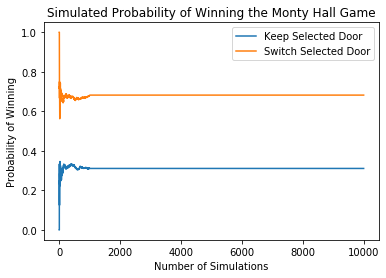

In [114]:
plt.plot(range(1,10**4+1), [np.mean(kept[:i]) for i in range(1,10**4+1)], label='Keep Selected Door')
plt.plot(range(1,10**4+1), [np.mean(change[:i]) for i in range(1,10**4+1)], label='Switch Selected Door')
plt.ylabel('Probability of Winning')
plt.xlabel('Number of Simulations')
plt.title('Simulated Probability of Winning the Monty Hall Game')
plt.legend()
print('Simulated Probabilities:')
print('Chance of Winning Keeping Selected Door: ', np.mean(kept))
print('Chance of Winning Switching Selected Door: ', np.mean(change))

## Summary

In this lab you further investigated the idea of Bayes' Theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully this was an entertaining little experience! 